<a href="https://colab.research.google.com/github/anuragsingh24082004/FUNCTIONS-PRACTICAL/blob/main/EDA_ASSNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                       ASSIGNMENT

**Title - Bike Details Dataset**

Q1 - WHAT IS THE RANGE OF SELLING PRICE IN THE DATASET ?

In [8]:
# ANSWER-
import pandas as pd
bike_data = pd.read_csv("BIKE DETAILS.csv")
# RANGE OF SELLING PRICES
range_of_selling_price = bike_data['selling_price'].min(), bike_data['selling_price'].max()
range_of_selling_price

(5000, 760000)

Q2- WHAT IS THE MEDIAN SELLING PRICE FOR BIKES IN THE DATASET ?

In [9]:
# ANSWER- MEDIAN SELLING PRICE
median_selling_price = bike_data['selling_price'].median()
median_selling_price


45000.0

Q3- WHAT IS THE MOST COMMON SELLER TYPE ?

In [10]:
#ANSWER-MOST COMMON SELLER TYPE
most_common_seller_type = bike_data['seller_type'].value_counts().idxmax()
most_common_seller_type

'Individual'

Q4- HOW MANY BIKES HAVE DRIVEN MORE THAN 50000 KILOMETERS ?

In [12]:
#ANSWER-NUMBER OF BIKES DRIVEN MORE THAN 50,000 KM
bikes_driven_above_50k_km = bike_data[bike_data['km_driven'] > 50000].shape[0]
bikes_driven_above_50k_km



170

Q5- WHAT IS THE AVERAGE KM_DRIVEN VALUE FOR EACH OWNERSHIP TYPE ?

In [13]:
#ANSWER-AVERAGE KM_DRIVEN VALUE FOR EACH OWNERSHIP TYPE
average_km_per_owner = bike_data.groupby('owner')['km_driven'].mean()
average_km_per_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Q6- WHAT IS PROPORTION OF BIKES ARE FROM THE YEAR 2015 OR OLDER ?

In [15]:
#ANSWER-PROPORTION OF BIKES FROM 2015 OR OLDER
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_bikes_2015_or_older = bikes_2015_or_older / bike_data.shape[0]

proportion_bikes_2015_or_older

0.5664467483506126

Q7- WHAT IS THE TREND OF MISSING VALUES ACROSS THE DATASET ?

In [17]:
#ANSWER- TREND OF MISSING VALUES
missing_values_trend = bike_data.isnull().sum()
missing_values_trend

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Q8- WHAT IS THE HIGHEST EX_SHOWROOM_PRICE RECORDED , ANF FOR WHICH BIKE ?

In [19]:
#ANSWER- HIGHEST EX_SHOWROOM_PRICE AND BIKE NAME
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_with_highest_ex_showroom_price = bike_data[bike_data['ex_showroom_price'] == highest_ex_showroom_price]['name'].iloc[0]

print(highest_ex_showroom_price)
print(bike_with_highest_ex_showroom_price)

1278000.0
Harley-Davidson Street Bob


Q9- WHAT IS THE TOTAL NUMBER OF BIKES LISTED BY EACH SELLER TYPE ?

In [20]:
#ANSWWER- TOTAL BIKES BY SELLER TYPE
total_bikes_by_seller_type = bike_data['seller_type'].value_counts()
print(total_bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Q10- WHAT IS THE RELATIONSNIP BETWEEN SELLING_PRICE AND KM_DRIVEN FOR FIRST OWNER BIKES ?

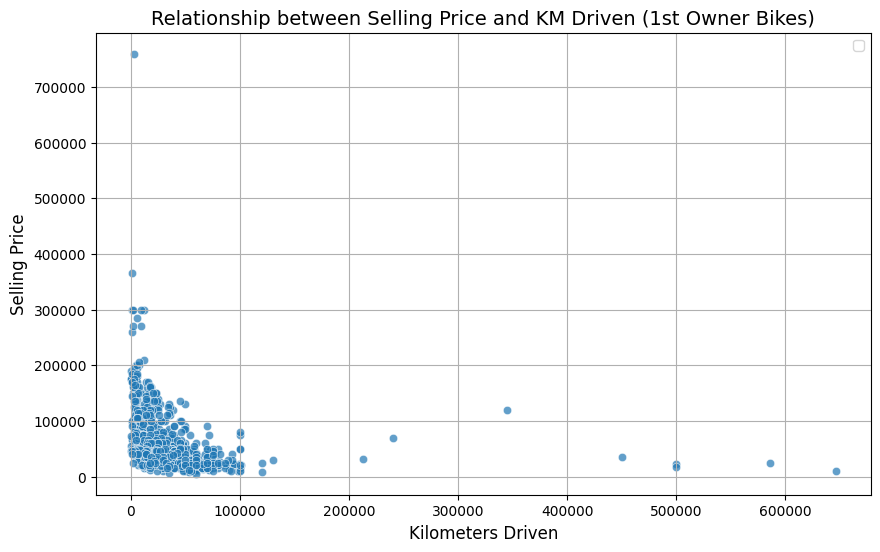

In [25]:
#ANSWER-
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for first-owner bikes
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']

# Scatter plot to visualize the relationship between selling_price and km_driven
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.7)
plt.title('Relationship between Selling Price and KM Driven (1st Owner Bikes)', fontsize=14)
plt.xlabel('Kilometers Driven', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


Q11- IDENTIFY AND REMOVE OUTLIERS IN KM_DRIVEN COLUMN USING THE IQR METHOD

In [24]:
#ANSWER-
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = bike_data[(bike_data['km_driven'] < lower_bound) | (bike_data['km_driven'] > upper_bound)]

# Removing outliers from the dataset
bike_data_no_outliers = bike_data[(bike_data['km_driven'] >= lower_bound) & (bike_data['km_driven'] <= upper_bound)]

len(outliers), bike_data_no_outliers.shape[0]


(39, 1022)

Q12- PERFORM A BIVARIATE ANALYSIS TO VISUALISE THE RELATIONSHIP BETWEEN YEAR AND SELLING_PRICE.

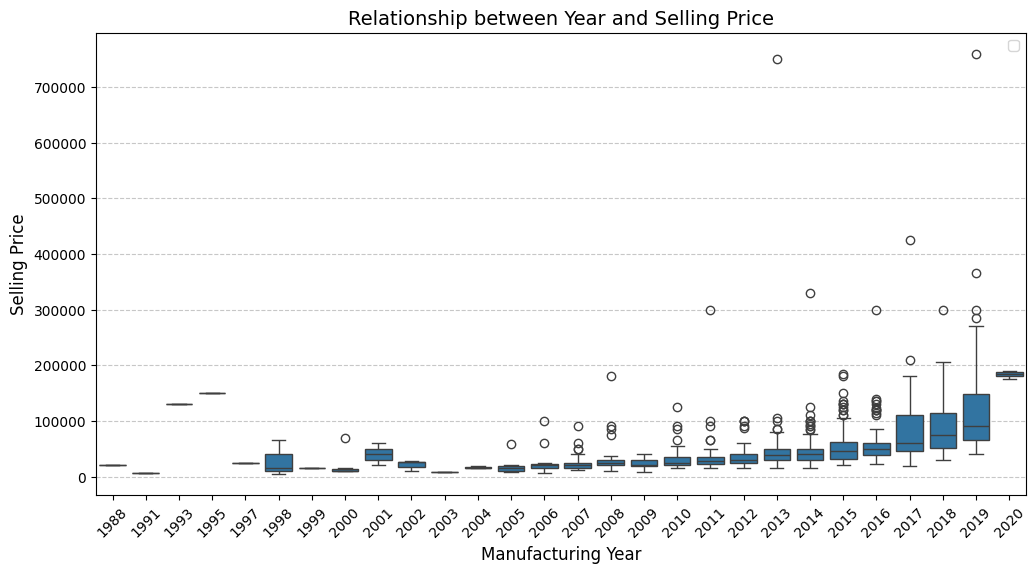

In [26]:
#ANSWER-
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate analysis: Relationship between year and selling_price
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_data_no_outliers, x='year', y='selling_price')
plt.title('Relationship between Year and Selling Price', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Q13- WHAT IS THE AVERAGE DEPRECIATION IN SELLING PRICE BAASED ON THE BIKE'S AGE ( CURRENT YEAR - MANUFACTURING YEAR ) ?

In [28]:
#ANSWER-
from datetime import datetime
current_year = datetime.now().year
bike_data_no_outliers['bike_age'] = current_year - bike_data_no_outliers['year']
average_depreciation = bike_data_no_outliers['selling_price'].mean() / bike_data_no_outliers['bike_age'].mean()
print(average_depreciation)


6089.954924056834


<ipython-input-28-31e6d47c4772>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_no_outliers['bike_age'] = current_year - bike_data_no_outliers['year']


Q14- WHICH BIKE NAMES ARE PRICED SIGNIFICALLY ABOVE THE AVERAGE PRICE FOR THEIR MANUFACTURING YEAR ?

In [29]:
#ANSWER-
avg_price_by_year = bike_data_no_outliers.groupby('year')['selling_price'].mean()
bike_data_no_outliers['avg_price_by_year'] = bike_data_no_outliers['year'].map(avg_price_by_year)
threshold = 1.5  # Bikes priced 50% above the average
high_priced_bikes = bike_data_no_outliers[
    bike_data_no_outliers['selling_price'] > threshold * bike_data_no_outliers['avg_price_by_year']
]

# Extracting the bike names
high_priced_bike_names = high_priced_bikes['name'].unique()

print("Bike names priced significantly above the average price for their manufacturing year:")
print(high_priced_bike_names)


Bike names priced significantly above the average price for their manufacturing year:
['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-David

<ipython-input-29-85dee970c134>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_no_outliers['avg_price_by_year'] = bike_data_no_outliers['year'].map(avg_price_by_year)


Q15- DEVELOP A CORRELATION MATRIX FOR NUMERIC COLUMNS AND VISUALIZE IT USING A HEATMAP.

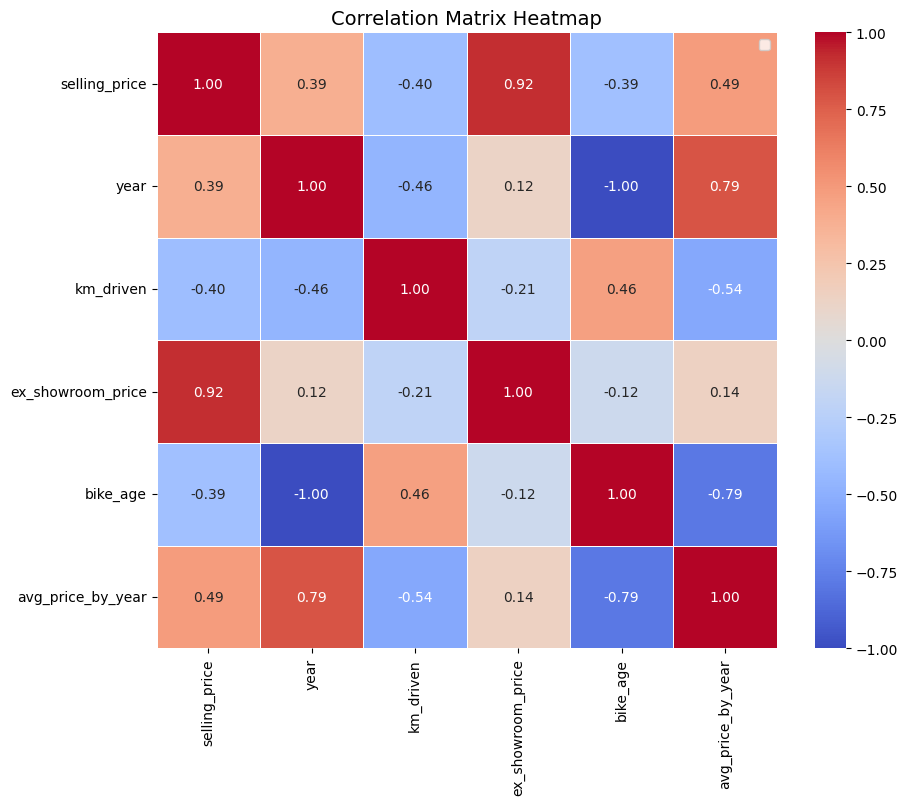

In [30]:
#ANSWER-
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = bike_data_no_outliers.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.legend()
plt.show()

